# Steps to follow 
1. Data cleaning
2. EDA
3. Feature Engineering

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()
df_copy= df.copy()

In [4]:
df.shape


(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# We will start off with checking of null vlaues
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Insights and observation 
Dataset has missing vlaues

In [8]:
#Check if all the values in reviews are numeric
df['Reviews'].unique() 
# String format - now to find out if there are any numerical values
df['Reviews'].str.isnumeric().sum()
# #Check if all the values in reviews are numeric
df['Reviews'].unique() 
# String format - now to find out if there are any numerical values
df['Reviews'].str.isnumeric().sum()
# np.int64(10840) - 1 column is not in the numeric format
df[~df['Reviews'].str.isnumeric()]
# Here the reviews is 3M now we need to covnert this 3M into a numeric value 
def convert_reviews(val):
    if isinstance(val, str):
        val = val.strip()
        if val.endswith('M'):
            return float(val[:-1]) * 1_000_000
        elif val.endswith('K'):
            return float(val[:-1]) * 1_000
        elif val.isnumeric():
            return int(val)
    return None  # or np.nan if you prefer

df_copy['Reviews'] = df_copy['Reviews'].apply(convert_reviews)

In [9]:
# Another way to convert the M and K to numbers is 
# df['Size'].str.replace('M', '000000') - but this only works if there is no decimal then 2.7M would become 2.7000000 which is 2.7 only
def convert_size(val):
    if isinstance(val,str):
        if val.endswith('M'):
            return float(val[:-1])*1000000
        elif val.endswith('k'):
            return float(val[:-1])*1000
        else:
            print(val)
            try:
                return float(val)
            except: # incase ther is a string like "Varies with device"
                return np.nan
    return None

df_copy['Size']= df_copy['Size'].apply(convert_size)

Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
Varies with 

In [10]:
df_copy['Installs'].unique() # This has + signs eg 2M+
df_copy['Installs'] =df_copy['Installs'].str.replace('+','')
df_copy['Installs'] = df_copy['Installs'].str.replace('Free','0')
df_copy['Installs'] = df_copy['Installs'].str.replace(',','')
df_copy['Installs']= df_copy['Installs'].astype('float')
df_copy['Installs'].unique() # This has + signs eg 2M+
df_copy.describe()

,Rating,Reviews,Size,Installs
count,9367.000000,1.084100e+04,9.145000e+03,1.084100e+04
mean,4.193338,4.443887e+05,2.151653e+07,1.546291e+07
std,0.537431,2.927728e+06,2.258875e+07,8.502557e+07
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00
25%,4.000000,3.800000e+01,4.900000e+06,1.000000e+03
50%,4.300000,2.094000e+03,1.300000e+07,1.000000e+05
75%,4.500000,5.479800e+04,3.000000e+07,5.000000e+06
max,19.000000,7.815831e+07,1.000000e+08,1.000000e+09


In [11]:
df_copy['Price'].unique() # This has $ signs
df_copy['Price'] =df_copy['Price'].str.replace('$','')
df_copy['Price'] = df_copy['Price'].str.replace('Everyone','0')
df_copy['Price']= df_copy['Price'].astype('float')
df_copy['Price'].unique() 

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [12]:
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      shape=(1378,), dtype=object)

In [13]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'], errors='coerce')
df_copy = df_copy[df_copy['Last Updated'].notnull()]
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year


In [14]:
df_copy.to_csv('data/google.csv')
# We didnt do any encoding for categorical variables

## Exploratory Data Analysis

In [17]:
df_copy[df_copy.duplicated('App')]
df_copy = df_copy.drop_duplicates(subset=['App'], keep= 'first')
df_copy[df_copy.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


In [19]:
df_copy.info()
type(df_copy['App'])

<class 'pandas.core.frame.DataFrame'>
Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   float64       
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int32         
 14  Month           9659 non-null   int32         
 15  Year    

pandas.core.series.Series

In [22]:
### now we will print the number of categorical and numerical type
numerical_col = [col for col in df_copy.columns if df_copy[col].dtype != 'O']
categorical_col = [col for col in df_copy.columns if df_copy[col].dtype == 'O']

print("There are {} and these are the numerical columns: {}".format(len(numerical_col), numerical_col))
print("There are {} and these are the categorical columns: {}".format(len(categorical_col), categorical_col))

''' 
Another way of writing
numerical_col = df_copy.select_dtypes(include=['float', 'int']).columns.tolist()
categorical_col = df_copy.select_dtypes(include=['object', 'category']).columns.tolist()

print("There are {} numerical columns: {}".format(len(numerical_col), numerical_col))
print("There are {} categorical columns: {}".format(len(categorical_col), categorical_col))

'''

There are 9 and these are the numerical columns: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
There are 7 and these are the categorical columns: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


' \nAnother way of writing\nnumerical_col = df_copy.select_dtypes(include=[\'float\', \'int\']).columns.tolist()\ncategorical_col = df_copy.select_dtypes(include=[\'object\', \'category\']).columns.tolist()\n\nprint("There are {} numerical columns: {}".format(len(numerical_col), numerical_col))\nprint("There are {} categorical columns: {}".format(len(categorical_col), categorical_col))\n\n'

## EDA for Categorical Variables
🔍 Questions to Ask:
- How many unique categories exist?
- Are some categories dominant?
- Are there typos or inconsistent labels?
- Does the category distribution change across the target?
- Are there rare labels that may need grouping?


In [28]:
for col in categorical_col:
    print(col)
    print(df_copy[col].value_counts(normalize=True))

App
App
Photo Editor & Candy Camera & Grid & ScrapBook    0.000104
Tic Tac CK                                        0.000104
INFAMY RO                                         0.000104
CK Call NEW                                       0.000104
Ck Coif                                           0.000104
                                                    ...   
Bike Race Free - Top Motorcycle Racing Games      0.000104
Dance School Stories - Dance Dreams Come True     0.000104
3D Bowling                                        0.000104
Mind Games Pro                                    0.000104
iHoroscope - 2018 Daily Horoscope & Astrology     0.000104
Name: proportion, Length: 9659, dtype: float64
Category
Category
FAMILY                 0.189668
GAME                   0.099286
TOOLS                  0.085620
BUSINESS               0.043483
MEDICAL                0.040895
PERSONALIZATION        0.038927
PRODUCTIVITY           0.038720
LIFESTYLE              0.038203
FINANCE               

<Axes: xlabel='App', ylabel='count'>

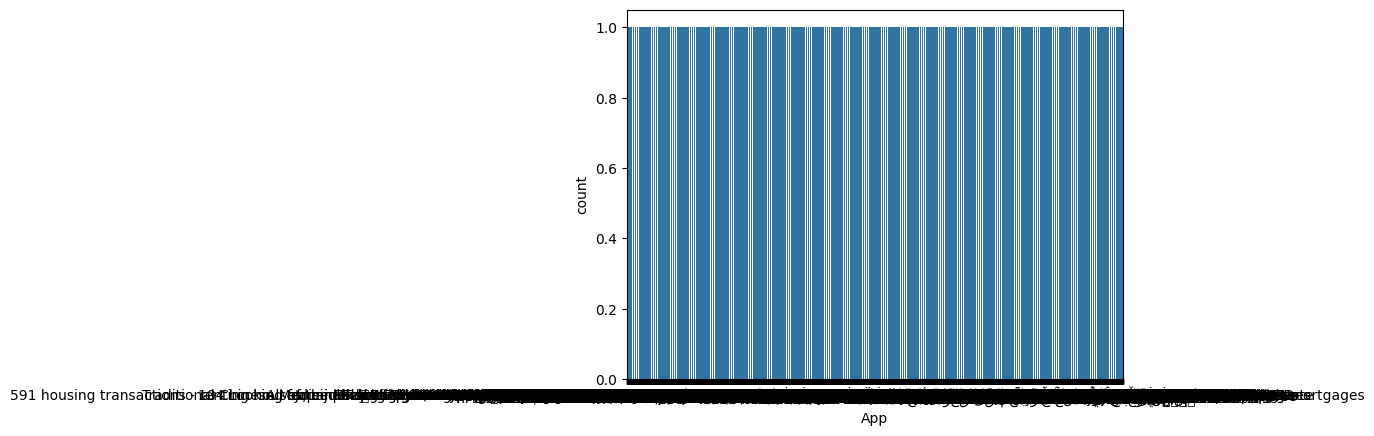

In [29]:
sns.countplot(x="App", data= df_copy)

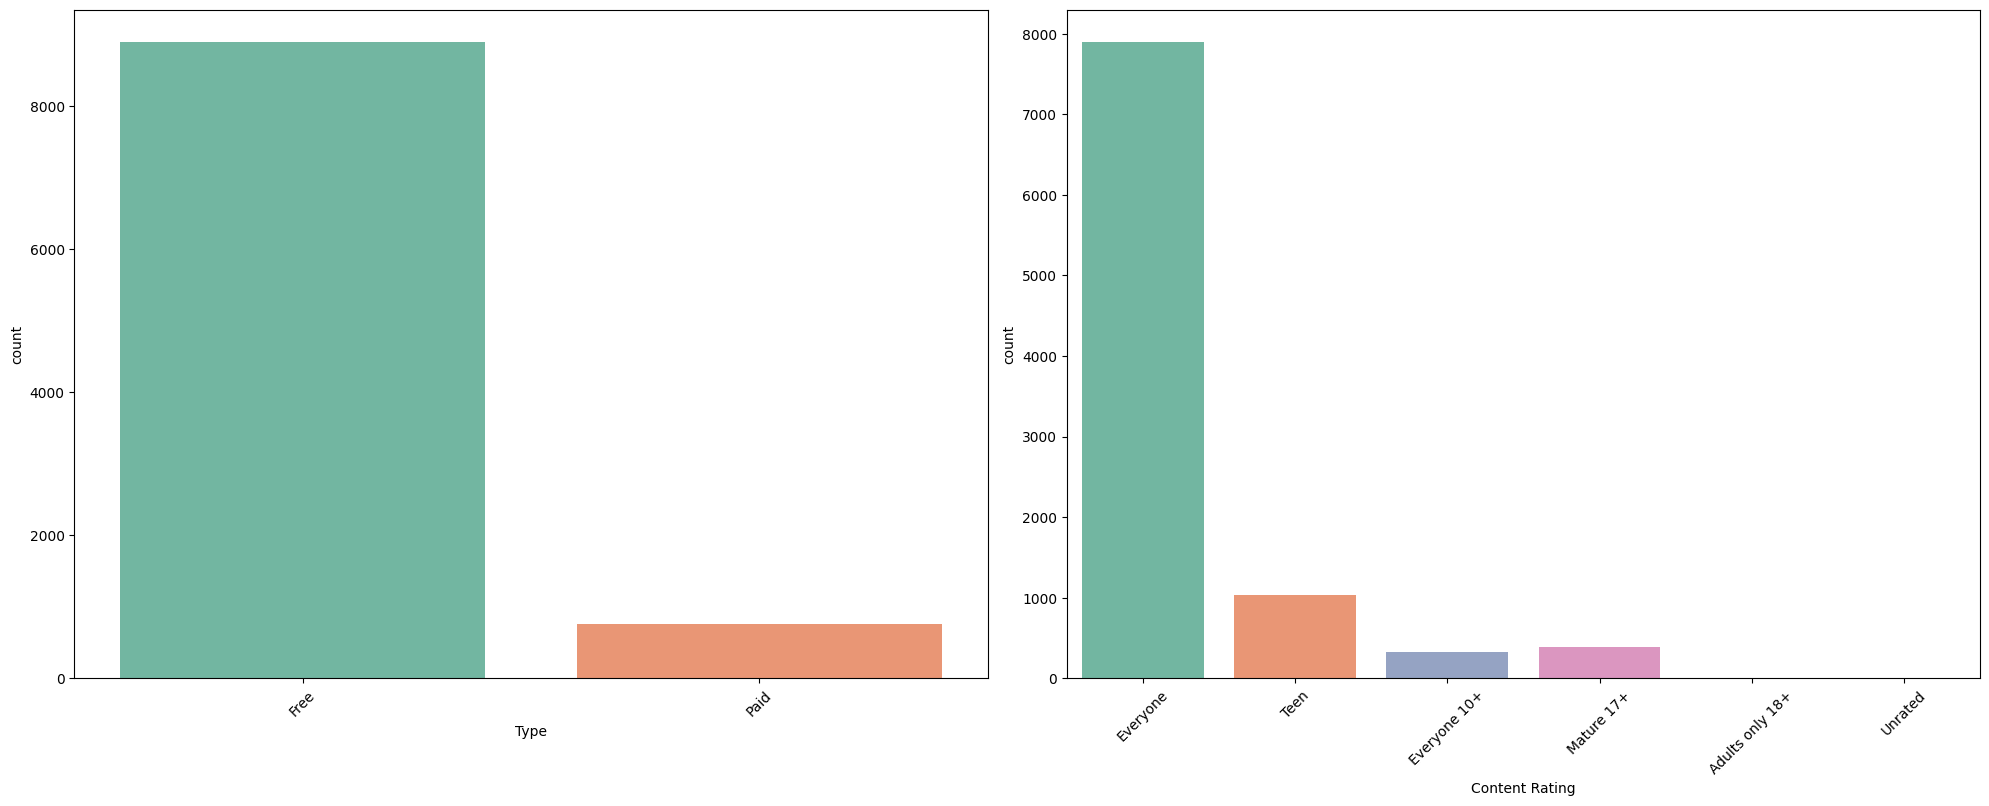

In [37]:
import matplotlib.pyplot as plt 

%matplotlib inline
plt.figure(figsize=(20,15))
category = ['Type', 'Content Rating' ]
for i in range(0, len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(data=df_copy, x=category[i] ,palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout() 


<Axes: ylabel='count'>

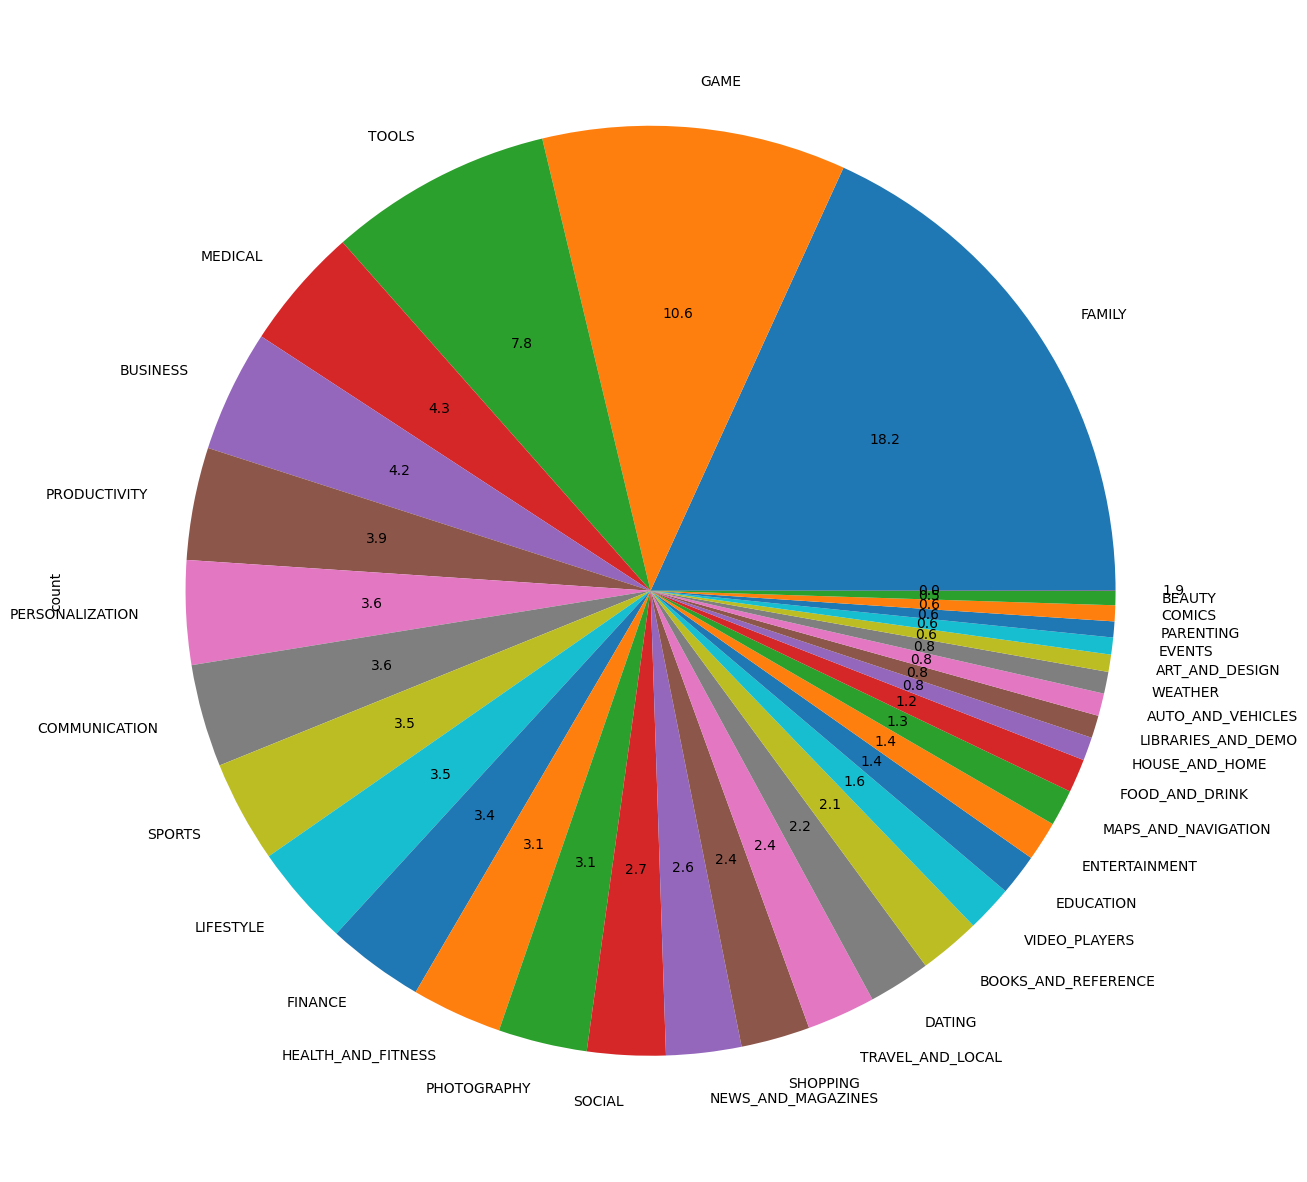

In [44]:
df["Category"].value_counts().plot.pie(figsize=(15,16),autopct="%1.1f")

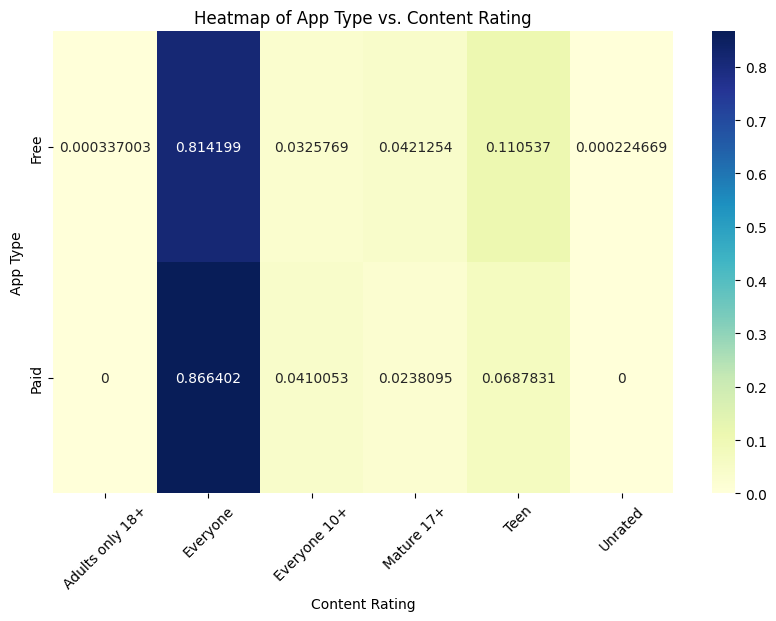

In [49]:
ct = pd.crosstab(df_copy['Type'], df_copy['Content Rating'], normalize='index')
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='g')  # 'g' = general number format
plt.title("Heatmap of App Type vs. Content Rating")
plt.ylabel("App Type")
plt.xlabel("Content Rating")
plt.xticks(rotation=45)
plt.show()

## Internal Assignments
1. Which Category has largest number of installations??
2. What are the Top 5 most installed Apps in Each popular Categories ??
3. How many apps are there on Google Play Store which get 5 ratings??

In [51]:
print(categorical_col)
print(numerical_col)

['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']


<Axes: ylabel='Installs'>

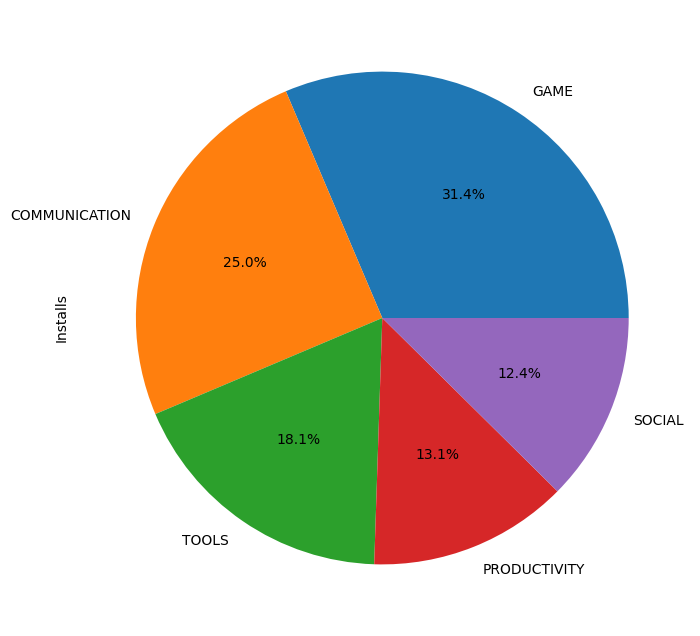

In [69]:
cat_install = df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()
top5 = cat_install[:5]

top5.set_index('Category')['Installs'].plot.pie(autopct="%.1f%%", figsize=(8,8))